In [184]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#https://archive.ics.uci.edu/ml/datasets/Breast+Cancer+Wisconsin+%28Diagnostic%29
df=pd.read_csv('data_cancer.csv')

df.head()


,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [185]:
df.isna().sum()

id                           0
diagnosis                    0
radius_mean                  0
texture_mean                 0
perimeter_mean               0
area_mean                    0
smoothness_mean              0
compactness_mean             0
concavity_mean               0
concave points_mean          0
symmetry_mean                0
fractal_dimension_mean       0
radius_se                    0
texture_se                   0
perimeter_se                 0
area_se                      0
smoothness_se                0
compactness_se               0
concavity_se                 0
concave points_se            0
symmetry_se                  0
fractal_dimension_se         0
radius_worst                 0
texture_worst                0
perimeter_worst              0
area_worst                   0
smoothness_worst             0
compactness_worst            0
concavity_worst              0
concave points_worst         0
symmetry_worst               0
fractal_dimension_worst      0
Unnamed:

In [186]:
df=df.drop(['Unnamed: 32','id'],axis=1)
df.shape

(569, 31)

In [187]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

X=df.iloc[:,1:33]
Y=df.iloc[:,0]
X_train,X_test,y_train,y_test=train_test_split(X,Y,random_state=1)



#make sure Y will be the output results
Y.head()

0    M
1    M
2    M
3    M
4    M
Name: diagnosis, dtype: object

In [188]:
knn=KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')
knn.fit(X_train,y_train)


KNeighborsClassifier(n_jobs=1)

In [189]:
knn.score(X_test,y_test)


0.9370629370629371

In [190]:
accuracy = []
max_accuracy=0

# Calculating score for K values between 1 and 40
for i in range(1, 50):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)
    score = knn.score(X_test,y_test)
    accuracy.append(score)
    if score>max_accuracy:
      max_accuracy=score
      k=i


print('max accuracy:',max_accuracy)
print('at k=',k)

max accuracy: 0.9440559440559441
at k= 4


Text(0, 0.5, 'Accuracy')

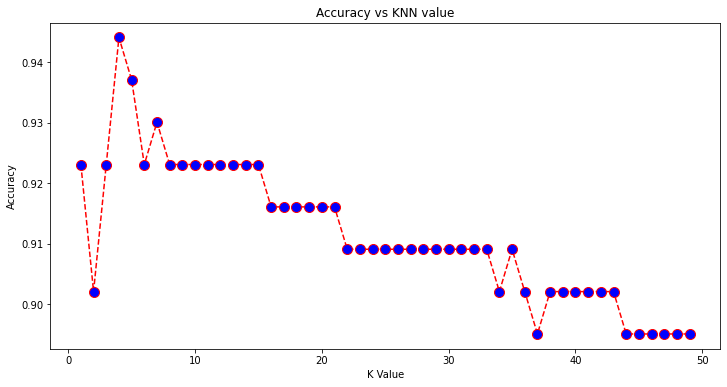

In [191]:
plt.figure(figsize=(12, 6))
plt.plot(range(1, 50), accuracy, color='red', linestyle='dashed', marker='o',
         markerfacecolor='blue', markersize=10)
plt.title('Accuracy vs KNN value')
plt.xlabel('K Value')
plt.ylabel('Accuracy')



In [192]:
#random select 4th row from X_test, note: X_test has no result
df_predict=X_test.iloc[3:4,:]
df_predict.shape
df_predict.head()


,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
186,18.31,18.58,118.6,1041.0,0.08588,0.08468,0.08169,0.05814,0.1621,0.05425,...,21.31,26.36,139.2,1410.0,0.1234,0.2445,0.3538,0.1571,0.3206,0.06938


In [193]:
#produce output with input of df_predict
prediction_test=knn.predict(df_predict)
if prediction_test=='B':
  print('Predicted output is: Benign')
else:
  print('Predicted output is: Malignant')

Predicted output is: Malignant


In [194]:
#must use one hot encoding, otherwise wont work in correlation
diagnosisDataframe=pd.get_dummies(df.diagnosis, prefix='diagnosis')
df = pd.concat([df, diagnosisDataframe], axis=1)

df.dtypes


diagnosis                   object
radius_mean                float64
texture_mean               float64
perimeter_mean             float64
area_mean                  float64
smoothness_mean            float64
compactness_mean           float64
concavity_mean             float64
concave points_mean        float64
symmetry_mean              float64
fractal_dimension_mean     float64
radius_se                  float64
texture_se                 float64
perimeter_se               float64
area_se                    float64
smoothness_se              float64
compactness_se             float64
concavity_se               float64
concave points_se          float64
symmetry_se                float64
fractal_dimension_se       float64
radius_worst               float64
texture_worst              float64
perimeter_worst            float64
area_worst                 float64
smoothness_worst           float64
compactness_worst          float64
concavity_worst            float64
concave points_worst

In [195]:
#drop original diagonsis column and change diagnosis_B and diagnosis_M to float
df=df.drop(['diagnosis'],axis=1)

#convert all columns to float64
df=df.astype(float)
df.head()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,diagnosis_B,diagnosis_M
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0.0,1.0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0.0,1.0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0.0,1.0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0.0,1.0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0.0,1.0


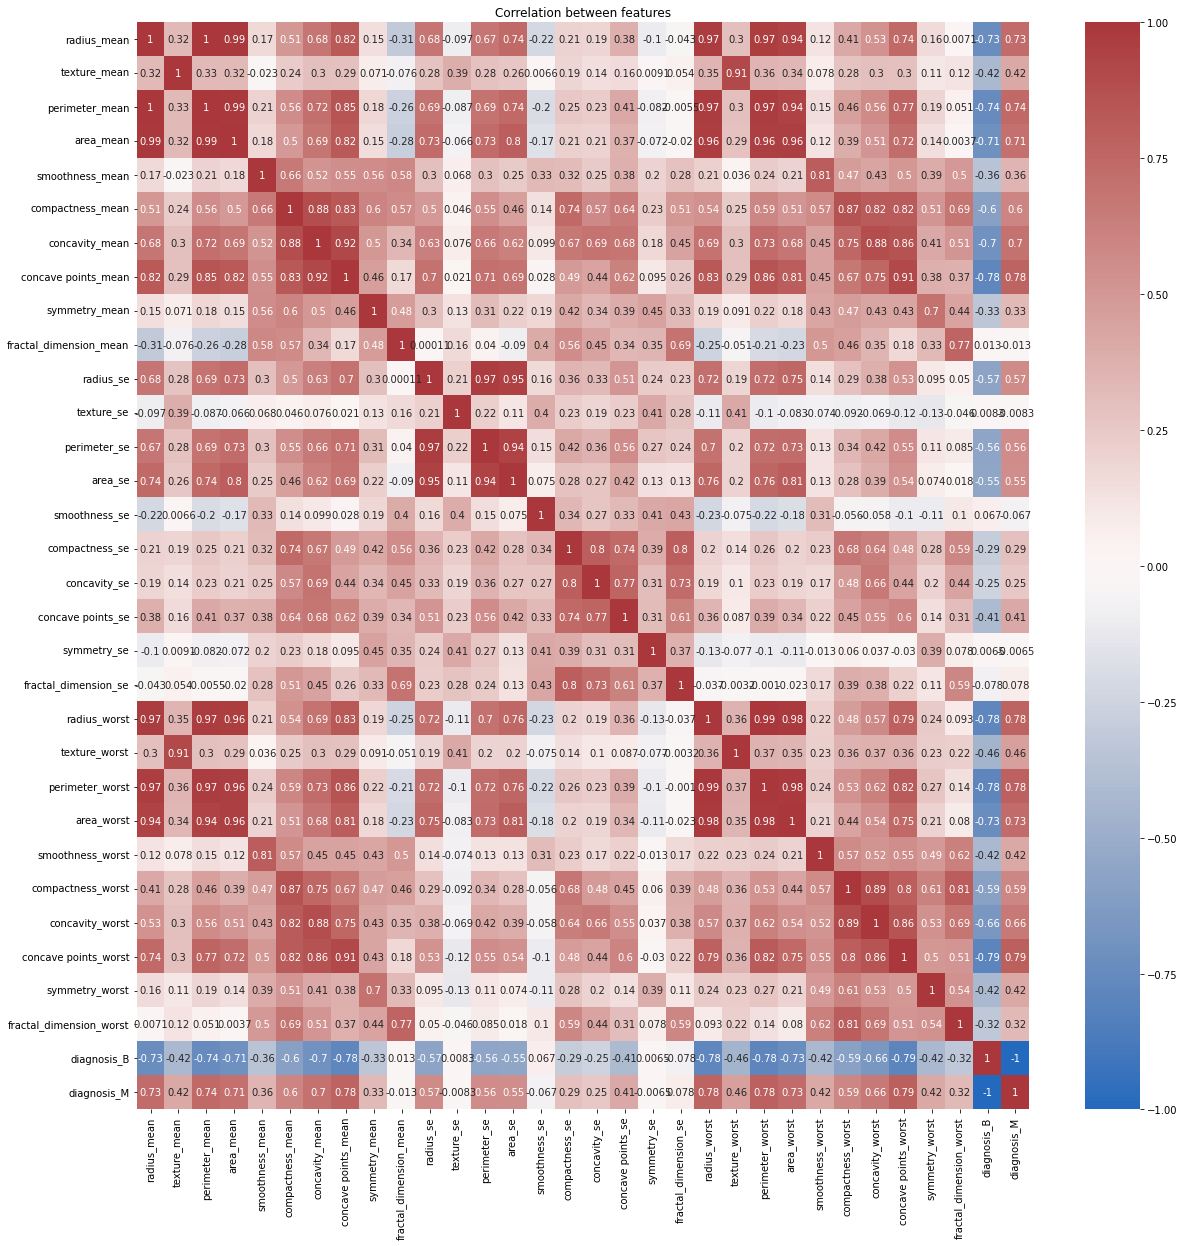

In [196]:
#Using Pearson Correlation
plt.figure(figsize=(20,20))
correlationDataframe = df.corr()
sns.heatmap(correlationDataframe, annot=True, cmap="vlag")
plt.title('Correlation between features')
plt.show()

In [197]:
#Correlation with output variable, for feature selection if applicable

print("Maglinant vs features correlation:")
cor_target = abs(correlationDataframe['diagnosis_M'])

#Selecting highly correlated features, over 0.7
relevant_features = cor_target[cor_target>0.7]
relevant_features


Maglinant vs features correlation:


radius_mean             0.730029
perimeter_mean          0.742636
area_mean               0.708984
concave points_mean     0.776614
radius_worst            0.776454
perimeter_worst         0.782914
area_worst              0.733825
concave points_worst    0.793566
diagnosis_B             1.000000
diagnosis_M             1.000000
Name: diagnosis_M, dtype: float64

In [198]:
#Correlation with output variable, for feature selection if applicable

print("Benign vs features correlation:")
cor_target = abs(correlationDataframe['diagnosis_B'])

#Selecting highly correlated features, over 0.7
relevant_features = cor_target[cor_target>0.7]
relevant_features

Benign vs features correlation:


radius_mean             0.730029
perimeter_mean          0.742636
area_mean               0.708984
concave points_mean     0.776614
radius_worst            0.776454
perimeter_worst         0.782914
area_worst              0.733825
concave points_worst    0.793566
diagnosis_B             1.000000
diagnosis_M             1.000000
Name: diagnosis_B, dtype: float64

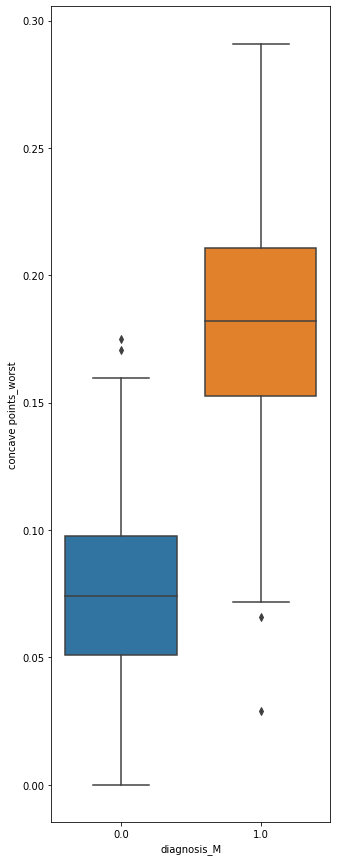

In [199]:
plt.figure(figsize=(5,15))
ax = sns.boxplot(x="diagnosis_M", y="concave points_worst", data=df)


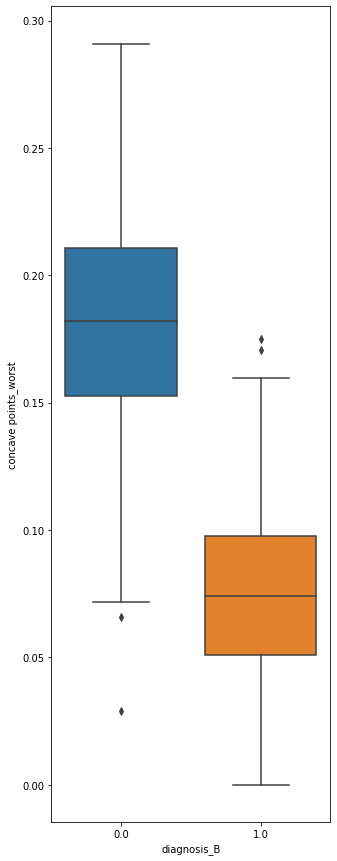

In [200]:
plt.figure(figsize=(5,15))
ax = sns.boxplot(x="diagnosis_B", y="concave points_worst", data=df)
